## **Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2

## **Loading the DataSet**

In [ ]:
# Load your Excel file with file names and class labels
excel_file_path = '/content/drive/MyDrive/MMDS_Dataset/shenzen/shenzhen_metadata.csv'
df = pd.read_csv(excel_file_path)

# Define the path to your image folder
image_folder_path = '/content/drive/MyDrive/MMDS_Dataset/shenzen/images/images'

## **Pre-Processing Techniques**

In [ ]:
df

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal
...,...,...,...,...
657,CHNCXR_0658_1.png,Male,41,bilateral secondary PTB with right pneumothorax
658,CHNCXR_0659_1.png,Male,33,secondary PTB in the left upper field
659,CHNCXR_0660_1.png,Male,50,1.bilateral secondary PTB with right upper at...
660,CHNCXR_0661_1.png,Male,26,bilateral secondary PTB with right pleural th...


In [ ]:
def update_class(row):
    if row['findings'] != 'normal':
        return 'Tuberculosis'
    else:
        return row['findings']

df['findings'] = df.apply(update_class, axis=1)
df.to_csv('updated_metadata_shenzen.csv', index=False)

In [ ]:
df

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal
...,...,...,...,...
657,CHNCXR_0658_1.png,Male,41,Tuberculosis
658,CHNCXR_0659_1.png,Male,33,Tuberculosis
659,CHNCXR_0660_1.png,Male,50,Tuberculosis
660,CHNCXR_0661_1.png,Male,26,Tuberculosis


## **Extracting Features**

## **1.VGG-19**

In [ ]:
# Load VGG-19 model pre-trained on ImageNet data
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [ ]:
def load_and_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(file_path):
    img_array = load_and_preprocess_image(file_path)
    features = model.predict(img_array)
    return features.flatten()

In [ ]:
# Create empty lists to store data
file_names = []
class_labels = []
features_list = []

In [ ]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    print(index+1)
    file_name = row['study_id']
    class_label = row['findings']
    file_path = image_folder_path +'/' +file_name

    try:
        # Load image and extract features
        features = extract_features(file_path)

        # Append data to lists
        file_names.append(file_name)
        class_labels.append(class_label)
        features_list.append(features)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

In [ ]:
features_df = pd.DataFrame(features_list, columns=[f'feature_{i}' for i in range(len(features_list[0]))])
features_df['File Name'] = file_names
features_df['Class'] = class_labels

# Reorder columns to have 'File Name' and 'Class' in the front
features_df = features_df[['File Name', 'Class'] + [col for col in features_df.columns if col not in ['File Name', 'Class']]]

features_df.to_excel('shenzen_features_vgg19.xlsx', index=False)

## **2. ResNet101**

In [ ]:
# Load ResNet101 model pre-trained on ImageNet data
base_model = ResNet101(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

179648224/179648224 [==============================] - 5s 0us/step


In [ ]:
def load_and_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(file_path):
    img_array = load_and_preprocess_image(file_path)
    features = model.predict(img_array)
    return features.flatten()

In [ ]:
# Create empty lists to store data
file_names = []
class_labels = []
features_list = []

In [ ]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    print(index+1)
    file_name = row['study_id']
    class_label = row['findings']
    file_path = image_folder_path +'/' +file_name

    try:
        # Load image and extract features
        features = extract_features(file_path)

        # Append data to lists
        file_names.append(file_name)
        class_labels.append(class_label)
        features_list.append(features)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

1
1/1 [==============================] - 2s 2s/step
2
1/1 [==============================] - 0s 304ms/step
3
1/1 [==============================] - 0s 308ms/step
4
1/1 [==============================] - 0s 316ms/step
5
1/1 [==============================] - 0s 303ms/step
6
1/1 [==============================] - 0s 323ms/step
7
1/1 [==============================] - 1s 538ms/step
8
1/1 [==============================] - 1s 536ms/step
9
1/1 [==============================] - 1s 545ms/step
10
1/1 [==============================] - 1s 546ms/step
11
1/1 [==============================] - 1s 528ms/step
12
1/1 [==============================] - 0s 323ms/step
13
1/1 [==============================] - 0s 314ms/step
14
1/1 [==============================] - 0s 321ms/step
15
1/1 [==============================] - 0s 317ms/step
16
1/1 [==============================] - 0s 319ms/step
17
1/1 [==============================] - 0s 312ms/step
18
1/1 [==============================] - 0s 320ms/step
19
1

In [ ]:
features_df = pd.DataFrame(features_list, columns=[f'feature_{i}' for i in range(len(features_list[0]))])
features_df['File Name'] = file_names
features_df['Class'] = class_labels

# Reorder columns to have 'File Name' and 'Class' in the front
features_df = features_df[['File Name', 'Class'] + [col for col in features_df.columns if col not in ['File Name', 'Class']]]

features_df.to_excel('shenzen_features_ResNet101.xlsx', index=False)

## **3. DenseNet201**

In [ ]:
# Load DenseNet201 model pre-trained on ImageNet data
base_model = DenseNet201(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

82524592/82524592 [==============================] - 1s 0us/step


In [ ]:
def load_and_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(file_path):
    img_array = load_and_preprocess_image(file_path)
    features = model.predict(img_array)
    return features.flatten()

In [ ]:
# Create empty lists to store data
file_names = []
class_labels = []
features_list = []

In [ ]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    print(index+1)
    file_name = row['study_id']
    class_label = row['findings']
    file_path = image_folder_path +'/' +file_name

    try:
        # Load image and extract features
        features = extract_features(file_path)

        # Append data to lists
        file_names.append(file_name)
        class_labels.append(class_label)
        features_list.append(features)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

1
1/1 [==============================] - 4s 4s/step
2
1/1 [==============================] - 0s 231ms/step
3
1/1 [==============================] - 0s 226ms/step
4
1/1 [==============================] - 0s 209ms/step
5
1/1 [==============================] - 0s 220ms/step
6
1/1 [==============================] - 0s 212ms/step
7
1/1 [==============================] - 0s 224ms/step
8
1/1 [==============================] - 0s 366ms/step
9
1/1 [==============================] - 0s 382ms/step
10
1/1 [==============================] - 0s 370ms/step
11
1/1 [==============================] - 0s 361ms/step
12
1/1 [==============================] - 0s 385ms/step
13
1/1 [==============================] - 0s 251ms/step
14
1/1 [==============================] - 0s 231ms/step
15
1/1 [==============================] - 0s 227ms/step
16
1/1 [==============================] - 0s 224ms/step
17
1/1 [==============================] - 0s 222ms/step
18
1/1 [==============================] - 0s 210ms/step
19
1

In [ ]:
features_df = pd.DataFrame(features_list, columns=[f'feature_{i}' for i in range(len(features_list[0]))])
features_df['File Name'] = file_names
features_df['Class'] = class_labels

# Reorder columns to have 'File Name' and 'Class' in the front
features_df = features_df[['File Name', 'Class'] + [col for col in features_df.columns if col not in ['File Name', 'Class']]]

features_df.to_excel('shenzen_features_DenseNet201.xlsx', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **CLASSIFING WITH XGBOOST**

## **1.VGG-19**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MMDS_Dataset/Features/shenzen_features_vgg19.xlsx')
df

,File Name,Class,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_4086,feature_4087,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095
0,CHNCXR_0001_0.png,normal,0.401733,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,3.322676,1.705062,0.0,1.413539,0.000000,0.000000,2.318089,0.844195,1.929453
1,CHNCXR_0002_0.png,normal,0.243127,0,0.0,0.0,0.000000,0.118899,0.000000,0.0,...,0.000000,1.371286,1.525544,0.0,1.053890,0.000000,0.000000,0.761315,0.000000,2.496897
2,CHNCXR_0003_0.png,normal,0.841467,0,0.0,0.0,0.013588,1.151339,0.022977,0.0,...,0.205397,2.155483,1.467915,0.0,0.898179,0.000000,0.000000,0.957281,0.000000,0.931017
3,CHNCXR_0004_0.png,normal,0.000000,0,0.0,0.0,0.429617,1.716273,0.000000,0.0,...,0.000000,2.335918,1.410915,0.0,0.995138,0.000000,0.000000,1.591789,0.000000,0.635341
4,CHNCXR_0005_0.png,normal,0.000000,0,0.0,0.0,0.201676,1.724750,0.000000,0.0,...,0.000000,2.728578,1.048897,0.0,1.593874,0.000000,0.401760,1.194834,0.000000,1.871252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,CHNCXR_0658_1.png,Tuberculosis,0.000000,0,0.0,0.0,0.000000,0.655497,0.000000,0.0,...,0.000000,5.606212,1.039608,0.0,1.679498,0.000000,0.937608,3.086907,0.264481,1.032165
658,CHNCXR_0659_1.png,Tuberculosis,0.000000,0,0.0,0.0,0.000000,1.552645,0.000000,0.0,...,0.000000,3.412366,3.388561,0.0,4.053060,0.000000,0.654671,4.869186,0.275454,1.631017
659,CHNCXR_0660_1.png,Tuberculosis,0.000000,0,0.0,0.0,2.244173,0.000000,0.000000,0.0,...,0.000000,4.010588,0.636165,0.0,0.691294,0.000000,1.592493,3.245303,0.000000,0.267043
660,CHNCXR_0661_1.png,Tuberculosis,0.000000,0,0.0,0.0,0.000000,1.077201,0.000000,0.0,...,0.000000,5.865722,1.968821,0.0,1.319180,0.541855,0.000000,4.122735,0.000000,1.006404


In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())
y_encoded=label_encoder.transform(y.values.ravel())

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y_encoded, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.65413534 0.78195489 0.81060606 0.72727273 0.78030303]
Average CV Score:  0.7508544087491457
Number of CV Scores used in Average:  5


Performance Metrics:
Accuracy: 0.7895
F1 Score: 0.7812
Precision: 0.7042
Recall: 0.8772
AUC: 0.8421
Log Loss: 0.7337


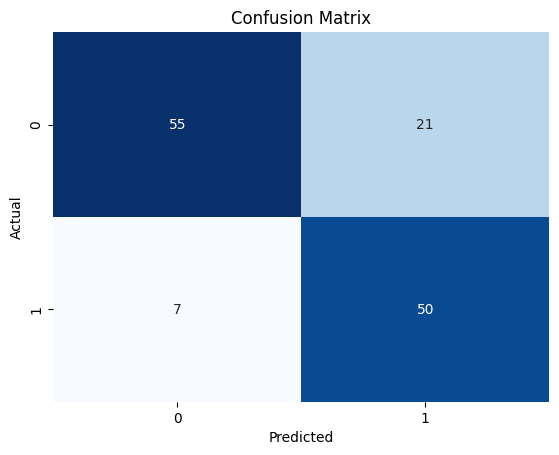


Additional Metrics:
Specificity (True Negative Rate): 0.7237
Sensitivity (Recall or True Positive Rate): 0.8772
Clarification Error: 0.2105

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80        76
           1       0.70      0.88      0.78        57

    accuracy                           0.79       133
   macro avg       0.80      0.80      0.79       133
weighted avg       0.81      0.79      0.79       133



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    classification_report,
)
from sklearn.datasets import make_classification

# Create an XGBoost classifier (replace with your preferred parameters)
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
auc = roc_auc_score(y_test_encoded, y_prob)
logloss = log_loss(y_test_encoded, y_prob)

print("Performance Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate clarification error
clarification_error = (cm[0, 1] + cm[1, 0]) / np.sum(cm)

# Display confusion matrix with colors
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print specificity, sensitivity, and clarification error
print("\nAdditional Metrics:")
print("Specificity (True Negative Rate): {:.4f}".format(specificity))
print("Sensitivity (Recall or True Positive Rate): {:.4f}".format(sensitivity))
print("Clarification Error: {:.4f}".format(clarification_error))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.61941	validation_1-logloss:0.66907
[1]	validation_0-logloss:0.55616	validation_1-logloss:0.64225
[2]	validation_0-logloss:0.50670	validation_1-logloss:0.62395
[3]	validation_0-logloss:0.46124	validation_1-logloss:0.60595
[4]	validation_0-logloss:0.42048	validation_1-logloss:0.59572
[5]	validation_0-logloss:0.38494	validation_1-logloss:0.58200
[6]	validation_0-logloss:0.35303	validation_1-logloss:0.57345
[7]	validation_0-logloss:0.32514	validation_1-logloss:0.56724
[8]	validation_0-logloss:0.29912	validation_1-logloss:0.55844
[9]	validation_0-logloss:0.27608	validation_1-logloss:0.55590
[10]	validation_0-logloss:0.25483	validation_1-logloss:0.55576
[11]	validation_0-logloss:0.23635	validation_1-logloss:0.54915
[12]	validation_0-logloss:0.21891	validation_1-logloss:0.54532
[13]	validation_0-logloss:0.20264	validation_1-logloss:0.54703
[14]	validation_0-logloss:0.18869	validation_1-logloss:0.54143
[15]	validation_0-logloss:0.17597	validation_1-logloss:0.53927
[1

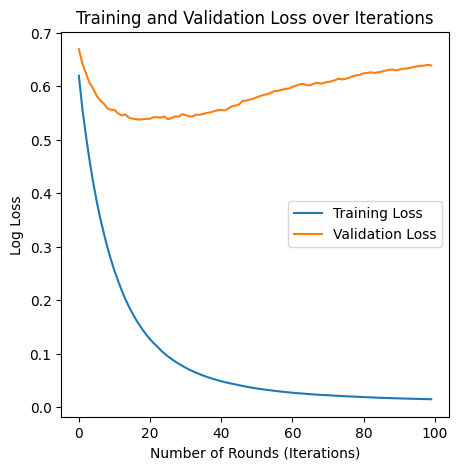

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define and fit the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the model and specify eval_set for both training and validation data
evals = [(X_train, y_train_encoded), (X_test, y_test_encoded)]
xgb_model.fit(X_train, y_train_encoded, eval_metric=["logloss"], eval_set=evals, verbose=True)

# Extract the training and validation loss
training_losses = xgb_model.evals_result()['validation_0']['logloss']
validation_losses = xgb_model.evals_result()['validation_1']['logloss']

# Create the loss plot
plt.figure(figsize=(5, 5))
plt.plot(training_losses, label='Training Loss', linestyle='-')
plt.plot(validation_losses, label='Validation Loss', linestyle='-')
plt.xlabel('Number of Rounds (Iterations)')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.savefig('shen_vgg_loss_plot.png')
plt.show()

## **2.ResNet101**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MMDS_Dataset/Features/shenzen_features_ResNet101.xlsx')
df

,File Name,Class,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_2038,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047
0,CHNCXR_0001_0.png,normal,0.173489,0.000000,0.000000,0.000000,0.156957,0.170126,0.000000,0.130163,...,0.000000,0.004790,0.467675,0.106810,1.000818,0.025968,0.156352,0.145433,0.886871,0.036320
1,CHNCXR_0002_0.png,normal,0.196489,0.009329,0.002545,0.000000,0.128525,0.383362,0.010396,0.792892,...,0.000674,0.467250,0.117607,0.319161,1.141056,0.465505,0.032107,0.372872,0.745814,0.000000
2,CHNCXR_0003_0.png,normal,0.674798,0.362413,0.000000,0.000000,0.571008,0.225149,0.183618,0.127580,...,0.065623,0.725290,0.445935,0.128003,0.251304,0.580137,0.067294,0.047882,0.992923,0.007747
3,CHNCXR_0004_0.png,normal,0.137720,0.034248,0.000626,0.046494,0.210336,0.189184,0.021175,0.352377,...,0.041177,0.449437,0.225103,0.575313,0.217313,0.502597,0.127063,0.520819,0.820604,0.231400
4,CHNCXR_0005_0.png,normal,0.066488,0.000000,0.000000,0.000000,0.344866,0.440441,0.000000,0.685945,...,0.031956,0.380783,0.129324,0.262427,0.098947,0.832989,0.000000,0.066728,0.511285,0.021394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,CHNCXR_0658_1.png,Tuberculosis,0.332389,0.017133,0.043826,0.000000,0.844651,0.077257,0.022053,0.158643,...,0.007144,0.220609,0.021058,0.625552,0.223940,0.210376,0.251695,0.075716,1.125581,0.076494
658,CHNCXR_0659_1.png,Tuberculosis,0.808758,0.031881,0.047684,0.013709,0.549147,0.142548,0.035609,0.172683,...,0.000000,0.248319,0.005323,0.089953,1.739011,0.090079,0.054642,0.078389,1.178237,0.018730
659,CHNCXR_0660_1.png,Tuberculosis,0.409592,0.154468,0.008107,0.008631,0.824759,0.084193,0.169463,0.167248,...,0.000000,0.285365,0.049852,0.310065,0.400137,0.416682,0.175221,1.254495,0.926098,0.109639
660,CHNCXR_0661_1.png,Tuberculosis,0.213301,0.036223,0.000000,0.000000,0.749737,0.077677,0.073953,0.209369,...,0.000000,0.207941,0.086451,0.207030,1.087411,0.240496,0.215567,0.000000,1.822331,0.001033


In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())
y_encoded=label_encoder.transform(y.values.ravel())

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y_encoded, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80451128 0.7593985  0.79545455 0.75       0.79545455]
Average CV Score:  0.7809637730690362
Number of CV Scores used in Average:  5


Performance Metrics:
Accuracy: 0.8045
F1 Score: 0.8000
Precision: 0.7123
Recall: 0.9123
AUC: 0.8915
Log Loss: 0.5461


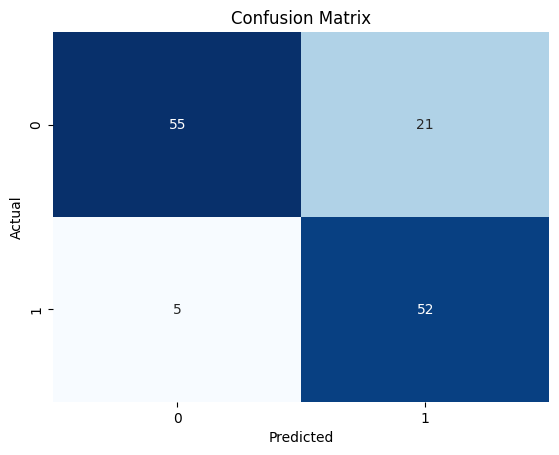


Additional Metrics:
Specificity (True Negative Rate): 0.7237
Sensitivity (Recall or True Positive Rate): 0.9123
Clarification Error: 0.1955

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        76
           1       0.71      0.91      0.80        57

    accuracy                           0.80       133
   macro avg       0.81      0.82      0.80       133
weighted avg       0.83      0.80      0.81       133



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    classification_report,
)
from sklearn.datasets import make_classification

# Create an XGBoost classifier (replace with your preferred parameters)
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
auc = roc_auc_score(y_test_encoded, y_prob)
logloss = log_loss(y_test_encoded, y_prob)

print("Performance Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate clarification error
clarification_error = (cm[0, 1] + cm[1, 0]) / np.sum(cm)

# Display confusion matrix with colors
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print specificity, sensitivity, and clarification error
print("\nAdditional Metrics:")
print("Specificity (True Negative Rate): {:.4f}".format(specificity))
print("Sensitivity (Recall or True Positive Rate): {:.4f}".format(sensitivity))
print("Clarification Error: {:.4f}".format(clarification_error))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.62035	validation_1-logloss:0.65027
[1]	validation_0-logloss:0.55943	validation_1-logloss:0.62104
[2]	validation_0-logloss:0.50471	validation_1-logloss:0.59525
[3]	validation_0-logloss:0.45759	validation_1-logloss:0.57072
[4]	validation_0-logloss:0.41596	validation_1-logloss:0.55248
[5]	validation_0-logloss:0.37878	validation_1-logloss:0.53972
[6]	validation_0-logloss:0.34655	validation_1-logloss:0.52712
[7]	validation_0-logloss:0.31835	validation_1-logloss:0.51768
[8]	validation_0-logloss:0.29122	validation_1-logloss:0.51684
[9]	validation_0-logloss:0.26701	validation_1-logloss:0.51426
[10]	validation_0-logloss:0.24607	validation_1-logloss:0.50713
[11]	validation_0-logloss:0.22689	validation_1-logloss:0.50093
[12]	validation_0-logloss:0.20987	validation_1-logloss:0.50350
[13]	validation_0-logloss:0.19480	validation_1-logloss:0.49320
[14]	validation_0-logloss:0.18078	validation_1-logloss:0.49295
[15]	validation_0-logloss:0.16840	validation_1-logloss:0.49241
[1

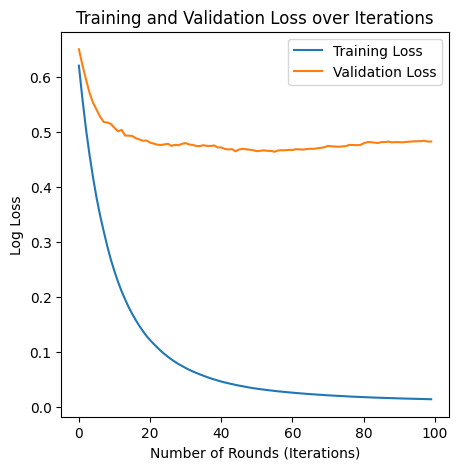

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define and fit the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the model and specify eval_set for both training and validation data
evals = [(X_train, y_train_encoded), (X_test, y_test_encoded)]
xgb_model.fit(X_train, y_train_encoded, eval_metric=["logloss"], eval_set=evals, verbose=True)

# Extract the training and validation loss
training_losses = xgb_model.evals_result()['validation_0']['logloss']
validation_losses = xgb_model.evals_result()['validation_1']['logloss']

# Create the loss plot
plt.figure(figsize=(5, 5))
plt.plot(training_losses, label='Training Loss', linestyle='-')
plt.plot(validation_losses, label='Validation Loss', linestyle='-')
plt.xlabel('Number of Rounds (Iterations)')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.savefig('shen_resnet_loss_plot.png')
plt.show()

## **3.DenseNet201**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MMDS_Dataset/Features/shenzen_features_DenseNet201.xlsx')
df

,File Name,Class,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1910,feature_1911,feature_1912,feature_1913,feature_1914,feature_1915,feature_1916,feature_1917,feature_1918,feature_1919
0,CHNCXR_0001_0.png,normal,0.000159,0.000616,0.000438,0.001664,0.000778,0.000353,0.000284,0.000687,...,0.051475,0.094233,0.022897,0.676366,0.143130,0.128637,0.082656,0.039781,0.259922,0.984561
1,CHNCXR_0002_0.png,normal,0.000094,0.000491,0.000514,0.001003,0.000854,0.000274,0.000217,0.000639,...,0.010617,0.033034,0.203370,1.319030,0.183728,0.146156,0.029143,0.552572,0.494493,0.918162
2,CHNCXR_0003_0.png,normal,0.000090,0.000455,0.000386,0.001062,0.000533,0.000301,0.000221,0.000453,...,0.037583,0.000313,0.417644,0.471262,0.427377,0.352127,0.311419,0.438008,0.118621,0.837701
3,CHNCXR_0004_0.png,normal,0.000137,0.000338,0.000367,0.001553,0.000755,0.000265,0.000189,0.000603,...,0.000000,0.005319,0.057086,1.261866,0.436439,0.019783,0.082469,0.201866,0.887815,1.181982
4,CHNCXR_0005_0.png,normal,0.000121,0.000472,0.000373,0.000956,0.000487,0.000317,0.000241,0.000454,...,0.006670,0.000000,1.089613,0.367087,0.509259,0.132652,0.678405,0.633965,0.437449,0.543385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,CHNCXR_0658_1.png,Tuberculosis,0.000141,0.000500,0.000448,0.001068,0.000697,0.000368,0.000248,0.000597,...,0.067363,0.024442,0.071216,0.651148,0.253084,0.858210,0.119782,0.057331,0.206226,2.189856
658,CHNCXR_0659_1.png,Tuberculosis,0.000104,0.000566,0.000369,0.000979,0.000794,0.000281,0.000281,0.000776,...,0.121169,0.400767,0.088695,0.495572,0.310121,0.943823,0.457356,0.477864,0.111254,2.913685
659,CHNCXR_0660_1.png,Tuberculosis,0.000151,0.000443,0.000243,0.001697,0.000733,0.000253,0.000164,0.000606,...,0.000000,0.996264,0.001124,1.385835,0.412276,0.825185,0.090041,0.063429,0.251553,1.244632
660,CHNCXR_0661_1.png,Tuberculosis,0.000140,0.000378,0.000376,0.001090,0.000916,0.000308,0.000215,0.000570,...,0.013819,0.025709,0.194451,1.127596,0.186407,0.168287,0.002531,0.113698,0.247294,1.209486


In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())
y_encoded=label_encoder.transform(y.values.ravel())

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y_encoded, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.79699248 0.81203008 0.79545455 0.71969697 0.81060606]
Average CV Score:  0.7869560264297106
Number of CV Scores used in Average:  5


Performance Metrics:
Accuracy: 0.8120
F1 Score: 0.8000
Precision: 0.7353
Recall: 0.8772
AUC: 0.8825
Log Loss: 0.6387


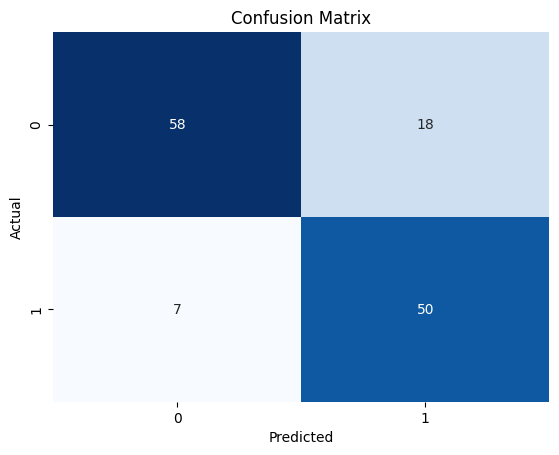


Additional Metrics:
Specificity (True Negative Rate): 0.7632
Sensitivity (Recall or True Positive Rate): 0.8772
Clarification Error: 0.1880

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        76
           1       0.74      0.88      0.80        57

    accuracy                           0.81       133
   macro avg       0.81      0.82      0.81       133
weighted avg       0.83      0.81      0.81       133



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    classification_report,
)
from sklearn.datasets import make_classification

# Create an XGBoost classifier (replace with your preferred parameters)
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
auc = roc_auc_score(y_test_encoded, y_prob)
logloss = log_loss(y_test_encoded, y_prob)

print("Performance Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate clarification error
clarification_error = (cm[0, 1] + cm[1, 0]) / np.sum(cm)

# Display confusion matrix with colors
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print specificity, sensitivity, and clarification error
print("\nAdditional Metrics:")
print("Specificity (True Negative Rate): {:.4f}".format(specificity))
print("Sensitivity (Recall or True Positive Rate): {:.4f}".format(sensitivity))
print("Clarification Error: {:.4f}".format(clarification_error))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.61666	validation_1-logloss:0.65339
[1]	validation_0-logloss:0.55703	validation_1-logloss:0.62375
[2]	validation_0-logloss:0.50297	validation_1-logloss:0.59337
[3]	validation_0-logloss:0.45412	validation_1-logloss:0.56749
[4]	validation_0-logloss:0.41891	validation_1-logloss:0.54582
[5]	validation_0-logloss:0.38311	validation_1-logloss:0.53602
[6]	validation_0-logloss:0.35080	validation_1-logloss:0.52254
[7]	validation_0-logloss:0.32182	validation_1-logloss:0.50695
[8]	validation_0-logloss:0.29673	validation_1-logloss:0.49716
[9]	validation_0-logloss:0.27219	validation_1-logloss:0.49147
[10]	validation_0-logloss:0.25153	validation_1-logloss:0.48466
[11]	validation_0-logloss:0.23321	validation_1-logloss:0.47998
[12]	validation_0-logloss:0.21498	validation_1-logloss:0.47318
[13]	validation_0-logloss:0.19954	validation_1-logloss:0.46407
[14]	validation_0-logloss:0.18514	validation_1-logloss:0.46090
[15]	validation_0-logloss:0.17242	validation_1-logloss:0.45489
[1

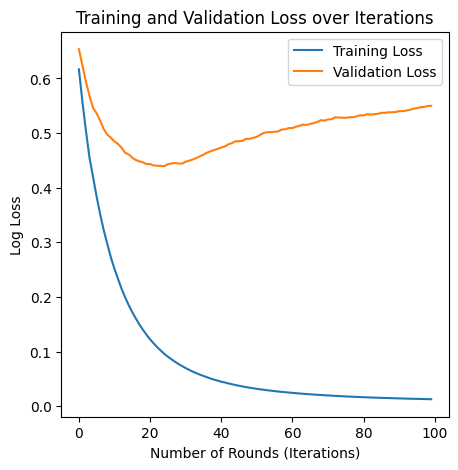

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define and fit the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the model and specify eval_set for both training and validation data
evals = [(X_train, y_train_encoded), (X_test, y_test_encoded)]
xgb_model.fit(X_train, y_train_encoded, eval_metric=["logloss"], eval_set=evals, verbose=True)

# Extract the training and validation loss
training_losses = xgb_model.evals_result()['validation_0']['logloss']
validation_losses = xgb_model.evals_result()['validation_1']['logloss']

# Create the loss plot
plt.figure(figsize=(5, 5))
plt.plot(training_losses, label='Training Loss', linestyle='-')
plt.plot(validation_losses, label='Validation Loss', linestyle='-')
plt.xlabel('Number of Rounds (Iterations)')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.savefig('shen_densenet_loss_plot.png')
plt.show()